In [ ]:
from google.colab import drive # import drive from google colab

ROOT = "/content/drive" 
drive.mount(ROOT, force_remount=True)  

Mounted at /content/drive


In [ ]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import os

def func_spec(cls):
    '''
    Function to create spectrogram images from audio files.
    First 60 audio files in given class are used for training set.
    Last 40 audio files in given class are used for test set.
    '''
    img_names = os.listdir('/content/drive/MyDrive/Data/genres_original/'+cls)
    if not os.path.exists('/content/drive/MyDrive/Data/spectrogram/train/'+cls):
      os.makedirs('/content/drive/MyDrive/Data/spectrogram/train/'+cls)
    if not os.path.exists('/content/drive/MyDrive/Data/spectrogram/test/'+cls):
      os.makedirs('/content/drive/MyDrive/Data/spectrogram/test/'+cls)
    print(cls)
    train_names = img_names[:60]
    test_names = img_names[60:]
    c1 = 0
    for i in train_names:
        c1+=1
        x , sr = librosa.load('/content/drive/MyDrive/Data/genres_original/'+cls+'/'+i)
        X = librosa.stft(x)
        Xdb = librosa.amplitude_to_db(abs(X))
        librosa.display.specshow(Xdb)
        plt.savefig('/content/drive/MyDrive/Data/spectrogram/train/'+cls+'/'+str(c1)+'.png')
        plt.close()
  
    c2 = 0
    for i in test_names:
        c2+=1
        x , sr = librosa.load('/content/drive/MyDrive/Data/genres_original/'+cls+'/'+i)
        X = librosa.stft(x)
        Xdb = librosa.amplitude_to_db(abs(X))
        librosa.display.specshow(Xdb)
        plt.savefig('/content/drive/MyDrive/Data/spectrogram/test/'+cls+'/'+str(c2)+'.png')
        plt.close()

In [ ]:
import os
def func_wavelet(cls):
    '''
    Function to create wavelet images from audio files.
    First 60 audio files in given class are used for training set.
    Last 40 audio files in given class are used for test set.
    '''
    img_names= os.listdir('/content/drive/MyDrive/Data/genres_original/'+cls)
    if not os.path.exists('/content/drive/MyDrive/Data/wavelets/train/'+cls):
      os.makedirs('/content/drive/MyDrive/Data/wavelets/train/'+cls)
    if not os.path.exists('/content/drive/MyDrive/Data/wavelets/test/'+cls):
      os.makedirs('/content/drive/MyDrive/Data/wavelets/test/'+cls)
    print(cls)
    train_names = img_names[:60]
    test_names = img_names[60:]
    c=0
    for i in train_names:
      print(c)
      c+=1
      x , sr =librosa.load('/content/drive/MyDrive/Data/genres_original/'+cls+'/'+i)
      librosa.display.waveplot(x)
      plt.savefig('/content/drive/MyDrive/Data/wavelets/train/'+cls+'/'+str(c)+'.png')
      plt.close()
    c=0
    for i in test_names:    
        print(c)
        c+=1
        x , sr=librosa.load('/content/drive/MyDrive/Data/genres_original/'+cls+'/'+i)
        librosa.display.waveplot(x)
        plt.savefig('/content/drive/MyDrive/Data/wavelets/test/'+cls+'/'+str(c)+'.png')
        plt.close()

In [ ]:
classes = [a for a in os.listdir('/content/drive/MyDrive/Data/genres_original')]
print(classes)

['pop', 'hiphop', 'disco', 'reggae', 'blues', 'classical', 'country', 'rock', 'metal', 'jazz']


In [ ]:
# Print the number of training and test files for each category
for cls in classes:
  l = len(os.listdir('/content/drive/MyDrive/Data/spectrogram/train/'+cls))
  print("Number of training spectrogram files for {}: {}".format(cls, l))
  l = len(os.listdir('/content/drive/MyDrive/Data/spectrogram/test/'+cls))
  print("Number of testing spectrogram files for {}: {}".format(cls, l))

  l = len(os.listdir('/content/drive/MyDrive/Data/wavelets/train/'+cls))
  print("Number of training wavelets files for {}: {}".format(cls, l))
  l = len(os.listdir('/content/drive/MyDrive/Data/wavelets/test/'+cls))
  print("Number of testing wavelets files for {}: {}".format(cls, l))

Number of training spectrogram files for pop: 60
Number of testing spectrogram files for pop: 40
Number of training wavelets files for pop: 60
Number of testing wavelets files for pop: 40
Number of training spectrogram files for hiphop: 60
Number of testing spectrogram files for hiphop: 40
Number of training wavelets files for hiphop: 60
Number of testing wavelets files for hiphop: 40
Number of training spectrogram files for disco: 60
Number of testing spectrogram files for disco: 40
Number of training wavelets files for disco: 60
Number of testing wavelets files for disco: 40
Number of training spectrogram files for reggae: 60
Number of testing spectrogram files for reggae: 40
Number of training wavelets files for reggae: 60
Number of testing wavelets files for reggae: 40
Number of training spectrogram files for blues: 60
Number of testing spectrogram files for blues: 40
Number of training wavelets files for blues: 60
Number of testing wavelets files for blues: 40
Number of training s

In [ ]:
#func_wavelet('reggae')
#func_wavelet('pop')
#func_wavelet('metal')
#func_wavelet('jazz')
#func_wavelet('hiphop')
#func_wavelet('disco')
#func_wavelet('country')
#func_wavelet('classical')
#func_wavelet('blues')
#func_wavelet('rock')

In [ ]:
#func_spec('reggae')
#func_spec('pop')
#func_spec('metal')
#func_spec('jazz')
#func_spec('hiphop')
#func_spec('disco')
#func_spec('country')
#func_spec('classical')
#func_spec('blues')
#func_spec('rock')

#Model Training

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import cv2
import os

import numpy as np

In [ ]:
labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
img_size = 256
def get_data(data_dir):
    '''
    Read all image files present in the given directory.
    The images are read into a numpy array using cv2.imread()
    Returns an array containing the images and their corresponding labels
    '''
    data = [] 
    for label in labels: 
        c = 0
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            c += 1
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
        print(label, c)
    return np.array(data)

In [ ]:
# train = get_data('/content/drive/MyDrive/Data/spectrogram/train')
# val = get_data('/content/drive/MyDrive/Data/spectrogram/test')

KeyboardInterrupt: ignored

In [ ]:
# x_train = []
# y_train = []
# x_val = []
# y_val = []

# for feature, label in train:
#   x_train.append(feature)
#   y_train.append(label)

# for feature, label in val:
#   x_val.append(feature)
#   y_val.append(label)

# # Normalize the data
# x_train = np.array(x_train) / 255
# x_val = np.array(x_val) / 255

# x_train.reshape(-1, img_size, img_size, 1)
# y_train = np.array(y_train)

# x_val.reshape(-1, img_size, img_size, 1)
# y_val = np.array(y_val)

In [ ]:
# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         #rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.2, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         #horizontal_flip = True,  # randomly flip images
#         vertical_flip=False)  # randomly flip images


# datagen.fit(x_train)

In [ ]:
# model = Sequential()
# model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(256,256,3)))
# model.add(MaxPool2D())

# model.add(Conv2D(32, 3, padding="same", activation="relu"))
# model.add(MaxPool2D())

# model.add(Conv2D(64, 3, padding="same", activation="relu"))
# model.add(MaxPool2D())
# model.add(Dropout(0.4))

# model.add(Flatten())
# model.add(Dense(128,activation="relu"))
# model.add(Dense(10, activation="softmax"))

# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0

In [ ]:
# opt = Adam(lr=0.0001)
# model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# history = model.fit(x_train,y_train,epochs = 500, validation_data = (x_val, y_val))


Epoch 1/500


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


19/19 [==============================] - 13s 129ms/step - loss: 2.2579 - accuracy: 0.1517 - val_loss: 2.0966 - val_accuracy: 0.2149
Epoch 2/500
19/19 [==============================] - 1s 60ms/step - loss: 1.9739 - accuracy: 0.3017 - val_loss: 2.0632 - val_accuracy: 0.2176
Epoch 3/500
19/19 [==============================] - 1s 60ms/step - loss: 1.7987 - accuracy: 0.3167 - val_loss: 2.1245 - val_accuracy: 0.2259
Epoch 4/500
19/19 [==============================] - 1s 59ms/step - loss: 1.7208 - accuracy: 0.3483 - val_loss: 1.9553 - val_accuracy: 0.2810
Epoch 5/500
19/19 [==============================] - 1s 60ms/step - loss: 1.6580 - accuracy: 0.3733 - val_loss: 1.9750 - val_accuracy: 0.2700
Epoch 6/500
19/19 [==============================] - 1s 61ms/step - loss: 1.5978 - accuracy: 0.4283 - val_loss: 2.0453 - val_accuracy: 0.3003
Epoch 7/500
19/19 [==============================] - 1s 60ms/step - loss: 1.5562 - accuracy: 0.4733 - val_loss: 1.9758 - val_accuracy: 0.2810
Epoch 8/500
19/1

In [ ]:
# import pickle
# model.save_weights('/content/drive/MyDrive/Data/M500_epoch_simple_lr.cpkt')

# pickle.dump(history.history, open('/content/drive/MyDrive/Data/history_500_epoch_simple.pkl','wb'))

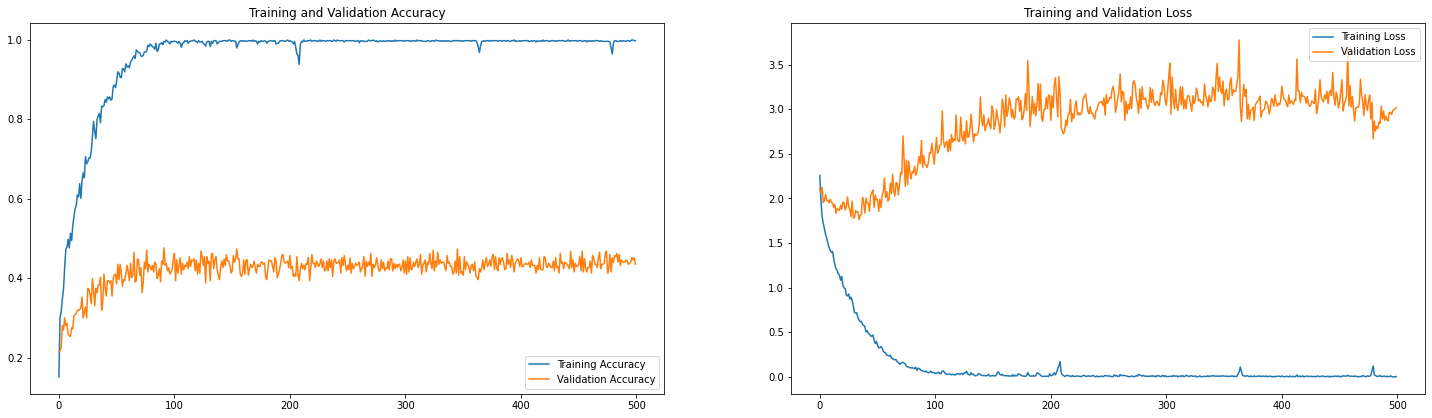

In [ ]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(500)

# plt.figure(figsize=(25, 15))
# plt.subplot(2, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(2, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

In [ ]:
# pred = model.predict(x_val)
# predictions = np.argmax(pred, axis=1)
# print(predictions)
# print(classfication_report(y_val, predictions, target_names=labels))
# # predictions = model.predict_classes(x_val)
# # predictions = predictions.reshape(1,-1)[0]
# # print(classification_report(y_val, predictions, target_names = labels))

NameError: ignored

In [ ]:
# import seaborn as sn
# import pandas as pd
# import matplotlib.pyplot as plt
# cm1 = confusion_matrix(y_val, predictions)
# df_cm = pd.DataFrame(cm1, index = [i f or i in labels],
#               columns = [i for i in labels])
# plt.figure(figsize = (10,7))
# sn.heatmap(df_cm, annot=True,cmap="RdPu")
# plt.savefig('confusion_mrtx2.png',bbox_inches = 'tight')

#Transfer Learning Based Model

In [ ]:
# base_model = tf.keras.applications.DenseNet201(input_shape = (256, 256, 3), include_top = False, weights = "imagenet")

74850304/74836368 [==============================] - 3s 0us/step


In [ ]:
# base_model.trainable = False
# model = tf.keras.Sequential([base_model,
#                                  tf.keras.layers.GlobalAveragePooling2D(),
#                                  tf.keras.layers.Dropout(0.2),
#                                  tf.keras.layers.Dense(10, activation="softmax")                                     
#                                 ])

In [ ]:
# base_learning_rate = 0.0001
# model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# history1 = model.fit(x_train,y_train,epochs = 500 , validation_data = (x_val, y_val))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


19/19 [==============================] - 48s 1s/step - loss: 2.5556 - accuracy: 0.0850 - val_loss: 2.3481 - val_accuracy: 0.1102
Epoch 2/500
19/19 [==============================] - 14s 730ms/step - loss: 2.4135 - accuracy: 0.1067 - val_loss: 2.2842 - val_accuracy: 0.1047
Epoch 3/500
19/19 [==============================] - 14s 728ms/step - loss: 2.3579 - accuracy: 0.0933 - val_loss: 2.2433 - val_accuracy: 0.1267
Epoch 4/500
19/19 [==============================] - 13s 725ms/step - loss: 2.3105 - accuracy: 0.1550 - val_loss: 2.2079 - val_accuracy: 0.1598
Epoch 5/500
19/19 [==============================] - 13s 724ms/step - loss: 2.2418 - accuracy: 0.1633 - val_loss: 2.1794 - val_accuracy: 0.1873
Epoch 6/500
19/19 [==============================] - 13s 725ms/step - loss: 2.1722 - accuracy: 0.2267 - val_loss: 2.1467 - val_accuracy: 0.1928
Epoch 7/500
19/19 [==============================] - 13s 725ms/step - loss: 2.1656 - accuracy: 0.2150 - val_loss: 2.1126 - val_accuracy: 0.2039
Epoch 8

In [ ]:
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 8, 8, 1920)        18321984  
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 10)                19210     
                                                                 
Total params: 18,341,194
Trainable params: 19,210
Non-trainable params: 18,321,984
_________________________________________________________________


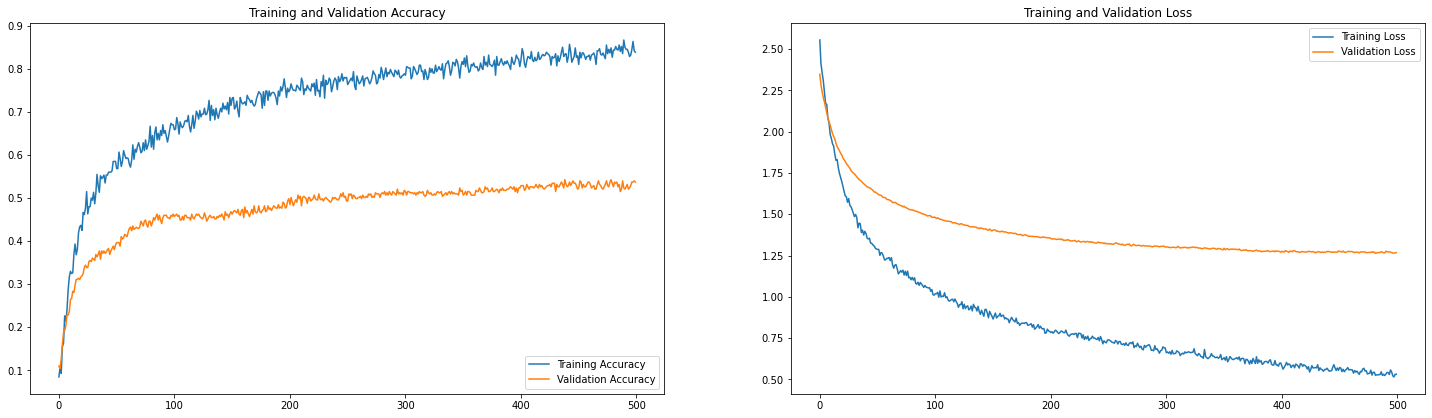

In [ ]:
# acc = history1.history['accuracy']
# val_acc = history1.history['val_accuracy']
# loss = history1.history['loss']
# val_loss = history1.history['val_loss']

# epochs_range = range(500)

# plt.figure(figsize=(25, 15))
# plt.subplot(2, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(2, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

In [ ]:
# predictions = model.predict_classes(x_val)
# predictions = predictions.reshape(1,-1)[0]
# print(classification_report(y_val, predictions, target_names = labels))

In [ ]:
# import seaborn as sn
# import pandas as pd
# import matplotlib.pyplot as plt
# cm1 = confusion_matrix(y_val, predictions)
# df_cm = pd.DataFrame(cm1, index = [i for i in labels],
#               columns = [i for i in labels])
# plt.figure(figsize = (10,7))
# sn.heatmap(df_cm, annot=True,cmap="RdPu")
# plt.savefig('confusion_mrtx2.png',bbox_inches = 'tight')

In [ ]:
# model.save_weights('/content/drive/MyDrive/Data/500_epoch_transfer_lr.cpkt')
# pickle.dump(history1.history, open('/content/drive/MyDrive/Data/history_500_epoch_tr.pkl','wb'))

In [ ]:
# import pickle
# model = pickle.load(open('/content/drive/MyDrive/Data/M500_epoch_simple_lr.cpkt.index', 'rb'))

UnpicklingError: ignored

In [ ]:
# model.save('/content/drive/MyDrive/Data/MyModel.h5')

#Combining both

In [ ]:
# Get spectrogram and wavelet data

sp_train = get_data('/content/drive/MyDrive/Data/spectrogram/train')
sp_val = get_data('/content/drive/MyDrive/Data/spectrogram/test')

wv_train = get_data('/content/drive/MyDrive/Data/wavelets/train')
wv_val = get_data('/content/drive/MyDrive/Data/wavelets/test')

blues 60
classical 60
country 60
disco 60
hiphop 60
jazz 60
metal 60
pop 60
reggae 60
rock 60


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


blues 40
classical 40
country 40
disco 40
hiphop 40
jazz 40
metal 40
pop 40
reggae 40
rock 40
blues 60
classical 60
country 60
disco 60
hiphop 60
jazz 60
metal 60
pop 60
reggae 60
rock 60
blues 40
classical 40
country 40
disco 40
hiphop 40
jazz 40
metal 40
pop 40
reggae 40
rock 40


In [ ]:
x_sp_train = []
y_sp_train = []
x_sp_val = []
y_sp_val = []
print(len(sp_val))
for feature, label in sp_train:
  x_sp_train.append(feature)
  y_sp_train.append(label)

for feature, label in sp_val:
  x_sp_val.append(feature)
  y_sp_val.append(label)


# Normalize the data
x_sp_train = np.array(x_sp_train) / 255
x_sp_val = np.array(x_sp_val) / 255

# Resize data so that it can be fed into the model
x_sp_train.reshape(-1, img_size, img_size, 1)
y_sp_train = np.array(y_sp_train)

x_sp_val.reshape(-1, img_size, img_size, 1)
y_sp_val = np.array(y_sp_val)

400


In [ ]:
x_wv_train = []
y_wv_train = []
x_wv_val = []
y_wv_val = []

for feature, label in wv_train:
  x_wv_train.append(feature)
  y_wv_train.append(label)

for feature, label in wv_val:
  x_wv_val.append(feature)
  y_wv_val.append(label)

# Normalize the data
x_wv_train = np.array(x_wv_train) / 255
x_wv_val = np.array(x_wv_val) / 255

# Resize data so that it can be fed into the model
x_wv_train.reshape(-1, img_size, img_size, 1)
y_wv_train = np.array(y_wv_train)

x_wv_val.reshape(-1, img_size, img_size, 1)
y_wv_val = np.array(y_wv_val)

In [ ]:
datagen_sp = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        #rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        #horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen_sp.fit(x_sp_train)

datagen_wv = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        #rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        #horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen_wv.fit(x_wv_train)

In [ ]:
print(x_sp_train.shape)
print(x_wv_train.shape)
print(y_sp_train.shape)
print(x_sp_val.shape)
print(x_wv_val.shape)
print(y_sp_val.shape)

(600, 256, 256, 3)
(600, 256, 256, 3)
(600,)
(400, 256, 256, 3)
(400, 256, 256, 3)
(400,)


In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(256, 256, 3), include_top = False, weights = "imagenet")

In [ ]:
input_sp = keras.Input(shape=(256,256,3))
input_wv = keras.Input(shape=(256,256,3))

x = base_model(input_sp, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, activation="relu")(x)

y = base_model(input_sp, training=False)
y = tf.keras.layers.GlobalAveragePooling2D()(y)
y = tf.keras.layers.Dropout(0.2)(y)
y = tf.keras.layers.Dense(128, activation="relu")(y)

from tensorflow.keras.layers import concatenate
combined = concatenate([x, y])

z = Dense(32, activation="relu")(combined)
z = Dense(10, activation="softmax")(z)

model = keras.Model(inputs=[input_sp, input_wv], outputs=z)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 mobilenetv2_1.00_224 (Function  (None, 8, 8, 1280)  2257984     ['input_2[0][0]',                
 al)                                                              'input_2[0][0]']                
                                                                                                  
 global_average_pooling2d (Glob  (None, 1280)        0           ['mobilenetv2_1.00_224[0][0]']   
 alAveragePooling2D)                                                                          

In [ ]:
opt = Adam(lr=0.0001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history2 = model.fit([np.array(x_sp_train),np.array(x_wv_train)],np.array(y_sp_train),epochs = 100, validation_data = ([x_sp_val,x_wv_val], y_sp_val))
import pickle
# model.save_weights('500_epoch_multi_lr.cpkt')
# pickle.dump(history2.history, open('history_500_epoch_multi.pkl','wb'))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


19/19 [==============================] - 33s 846ms/step - loss: 2.2764 - accuracy: 0.1433 - val_loss: 2.1036 - val_accuracy: 0.2325
Epoch 2/100
19/19 [==============================] - 12s 614ms/step - loss: 2.0827 - accuracy: 0.1983 - val_loss: 2.0642 - val_accuracy: 0.2625
Epoch 3/100
19/19 [==============================] - 12s 619ms/step - loss: 1.9152 - accuracy: 0.2667 - val_loss: 2.0383 - val_accuracy: 0.2325
Epoch 4/100
19/19 [==============================] - 12s 613ms/step - loss: 1.7173 - accuracy: 0.3467 - val_loss: 1.8368 - val_accuracy: 0.3575
Epoch 5/100
19/19 [==============================] - 12s 627ms/step - loss: 1.4815 - accuracy: 0.4683 - val_loss: 1.7665 - val_accuracy: 0.3450
Epoch 6/100
19/19 [==============================] - 12s 622ms/step - loss: 1.3938 - accuracy: 0.5017 - val_loss: 1.7060 - val_accuracy: 0.4000
Epoch 7/100
19/19 [==============================] - 12s 619ms/step - loss: 1.2283 - accuracy: 0.5833 - val_loss: 1.7598 - val_accuracy: 0.3025
Epoc

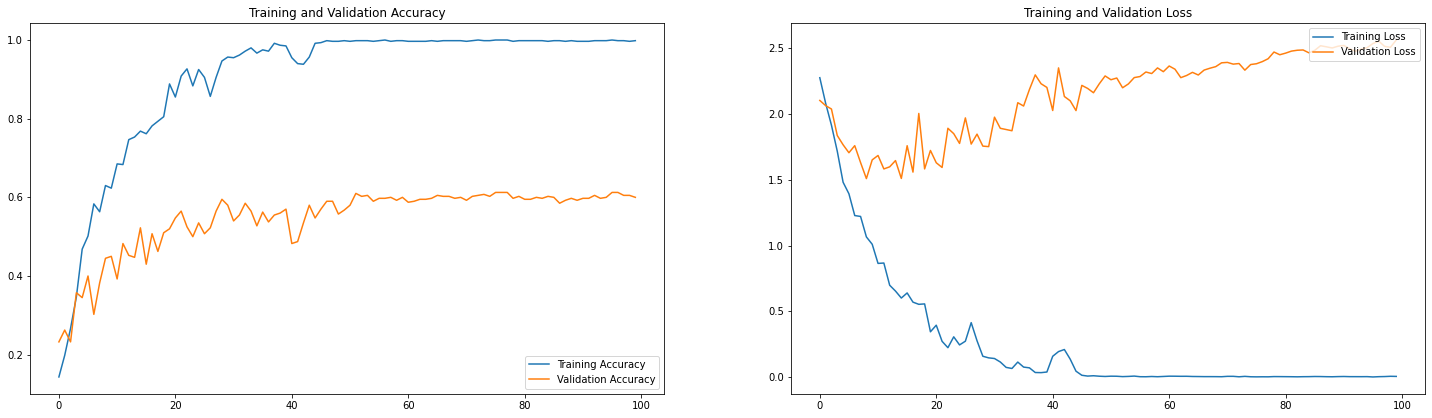

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predictions = model.predict([x_sp_val,x_wv_val])
print(classification_report(y_wv_val, np.argmax(predictions, axis=1), target_names = labels))

              precision    recall  f1-score   support

       blues       0.45      0.38      0.41        40
   classical       0.86      0.80      0.83        40
     country       0.58      0.62      0.60        40
       disco       0.43      0.50      0.46        40
      hiphop       0.56      0.75      0.64        40
        jazz       0.70      0.75      0.72        40
       metal       0.60      0.72      0.66        40
         pop       0.80      0.70      0.75        40
      reggae       0.46      0.47      0.47        40
        rock       0.63      0.30      0.41        40

    accuracy                           0.60       400
   macro avg       0.61      0.60      0.59       400
weighted avg       0.61      0.60      0.59       400



(400,)
[0 6 0 6 0 6 6 0 6 4 8 0 6 6 0 6 6 3 0 3 6 8 6 6 3 5 8 0 0 5 0 8 8 0 5 0 8
 0 0 0 1 1 5 1 5 1 1 1 5 1 1 1 5 5 1 1 1 1 1 1 1 1 1 5 5 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 5 2 3 9 2 2 7 2 2 2 0 5 5 0 2 9 0 2 3 2 2 3 2 2 2 3 2 2 2 6 2 0
 2 2 2 2 2 2 2 9 2]


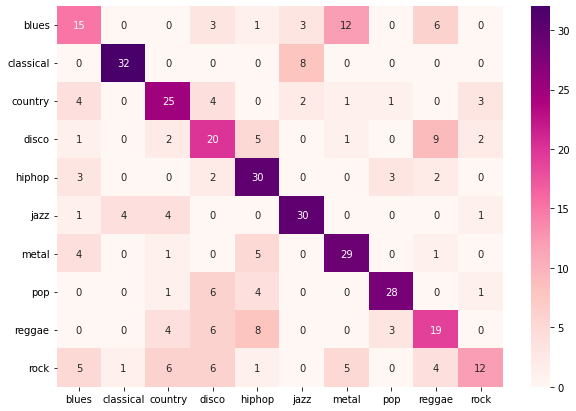

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
print(predictions.shape)
print(predictions[0:120])
#predictions = np.argmax(predictions, axis=1)
cm1 = confusion_matrix(y_wv_val, predictions)
df_cm = pd.DataFrame(cm1, index = [i for i in labels],
              columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="RdPu")
plt.savefig('confusion_mrtx3.png',bbox_inches = 'tight')

In [ ]:
model.save("/content/drive/MyDrive/Data/MobileNetV2Combined-2.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
# model1 = keras.models.load_model('/content/drive/MyDrive/Data/MyModel.h5')
# model2 = keras.models.load_model('/content/drive/MyDrive/Data/MobileNetV2Combined-2.h5')

In [ ]:
# model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 mobilenetv2_1.00_224 (Function  (None, 8, 8, 1280)  2257984     ['input_2[0][0]',                
 al)                                                              'input_2[0][0]']                
                                                                                                  
 global_average_pooling2d (Glob  (None, 1280)        0           ['mobilenetv2_1.00_224[0][0]']   
 alAveragePooling2D)                                                                          